In [4]:
# Data Handling
import csv
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# System Information
import platform

# Numeric Computation and Array Handling
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [5]:
# Print Python version
print("Python Version:", platform.python_version())

Python Version: 3.11.5


In [6]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\d209\medical_clean.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [7]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [9]:
# Find missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [10]:
# Find duplicates
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 50 columns]


In [11]:
# Drop columns irrelevant to the analysis
columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 
                   'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
                  'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item5', 'Item6', 'Item7', 'Item8']

# Drop the specified columns
df_new = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_new.info)

<bound method DataFrame.info of           Area  Children  Age    Income    Marital  Gender ReAdmis  \
0     Suburban         1   53  86575.93   Divorced    Male      No   
1        Urban         3   51  46805.99    Married  Female      No   
2     Suburban         3   53  14370.14    Widowed  Female      No   
3     Suburban         0   78  39741.49    Married    Male      No   
4        Rural         1   22   1209.56    Widowed  Female      No   
...        ...       ...  ...       ...        ...     ...     ...   
9995     Urban         2   25  45967.61    Widowed    Male      No   
9996     Urban         4   87  14983.02    Widowed    Male     Yes   
9997     Rural         3   45  65917.81  Separated  Female     Yes   
9998     Rural         3   43  29702.32   Divorced    Male     Yes   
9999     Urban         8   70  62682.63  Separated  Female     Yes   

      VitD_levels  Doc_visits  Full_meals_eaten  ...  Hyperlipidemia BackPain  \
0       19.141466           6                 

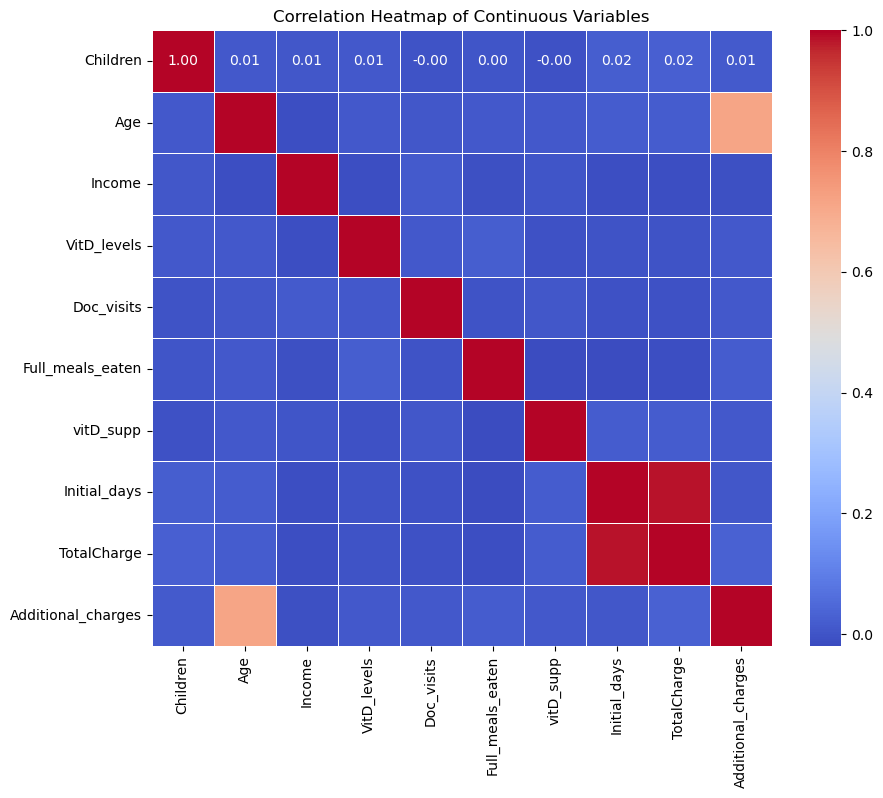

In [12]:
# Select the variables for the correlation heatmap
cont_var = ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 
             'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# Subset the dataframe with the selected variables
df_subset = df[cont_var]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.savefig("corr_con.png")
plt.show()

In [13]:
# List of categorical columns to be encoded
categorical_columns = [
    'Area', 'Marital', 'Gender', 'ReAdmis',
    'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
    'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'
]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df_new[column] = encoder.fit_transform(df[column])

# Display the updated DataFrame
pd.set_option('display.max_columns', None)
print(df_new)

      Area  Children  Age    Income  Marital  Gender  ReAdmis  VitD_levels  \
0        1         1   53  86575.93        0       1        0    19.141466   
1        2         3   51  46805.99        1       0        0    18.940352   
2        1         3   53  14370.14        4       0        0    18.057507   
3        1         0   78  39741.49        1       1        0    16.576858   
4        0         1   22   1209.56        4       0        0    17.439069   
...    ...       ...  ...       ...      ...     ...      ...          ...   
9995     2         2   25  45967.61        4       1        0    16.980860   
9996     2         4   87  14983.02        4       1        1    18.177020   
9997     0         3   45  65917.81        3       0        1    17.129070   
9998     0         3   43  29702.32        0       1        1    19.910430   
9999     2         8   70  62682.63        3       0        1    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Init

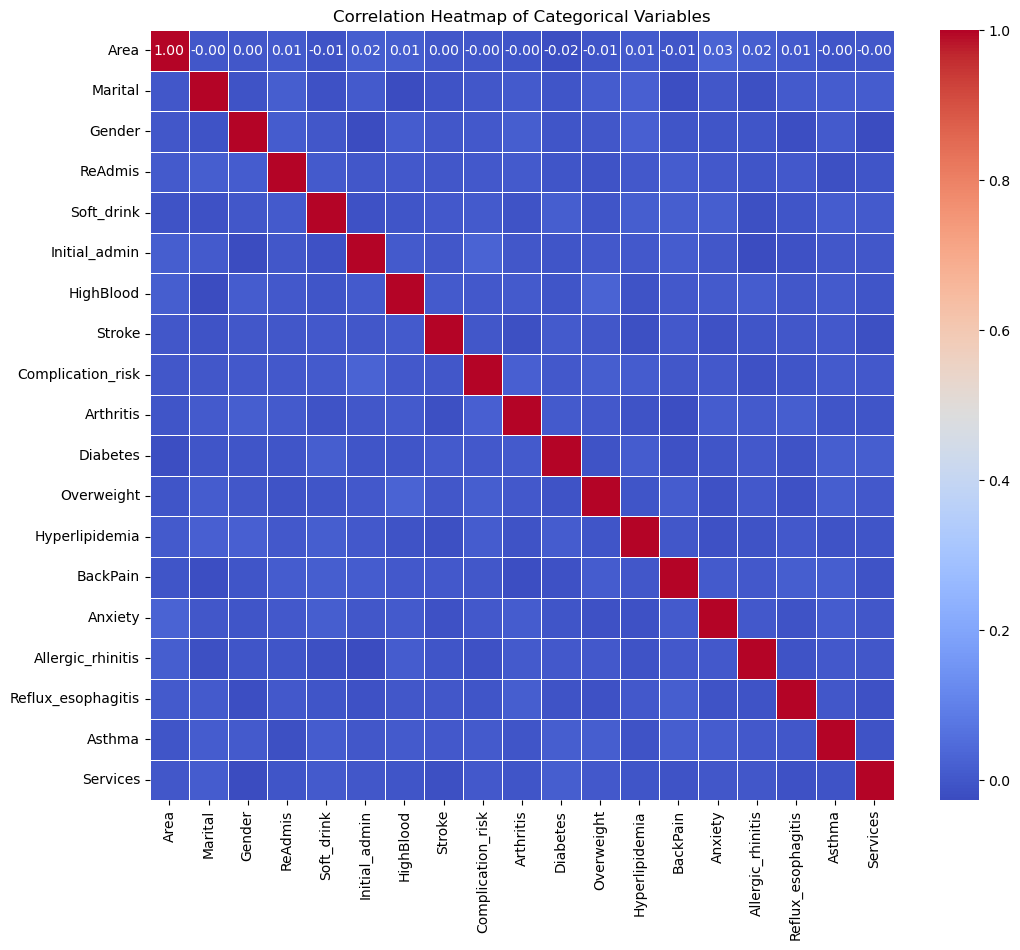

In [14]:
# Select the variables for the correlation heatmap
cat = ['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 
             'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 
             'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
             'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']

# Subset the dataframe with the selected variables
df_subcat = df_new[cat]

# Calculate the correlation matrix
correlation_matrix = df_subcat.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Categorical Variables')
plt.savefig("corr_categorical.png")
plt.show()

In [15]:
# Drop age, initial days and total charge because of the high correlation
columns_to_drop = ['Age', 'TotalCharge', 'Initial_days']

# Drop the specified columns
df_new = df_new.drop(columns=columns_to_drop)

# Display the updated DataFrame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  int32  
 1   Children            10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  int32  
 4   Gender              10000 non-null  int32  
 5   ReAdmis             10000 non-null  int32  
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  int32  
 11  Initial_admin       10000 non-null  int32  
 12  HighBlood           10000 non-null  int32  
 13  Stroke              10000 non-null  int32  
 14  Complication_risk   10000 non-null  int32  
 15  Overweight          10000 non-null  int32  
 16  Arthr

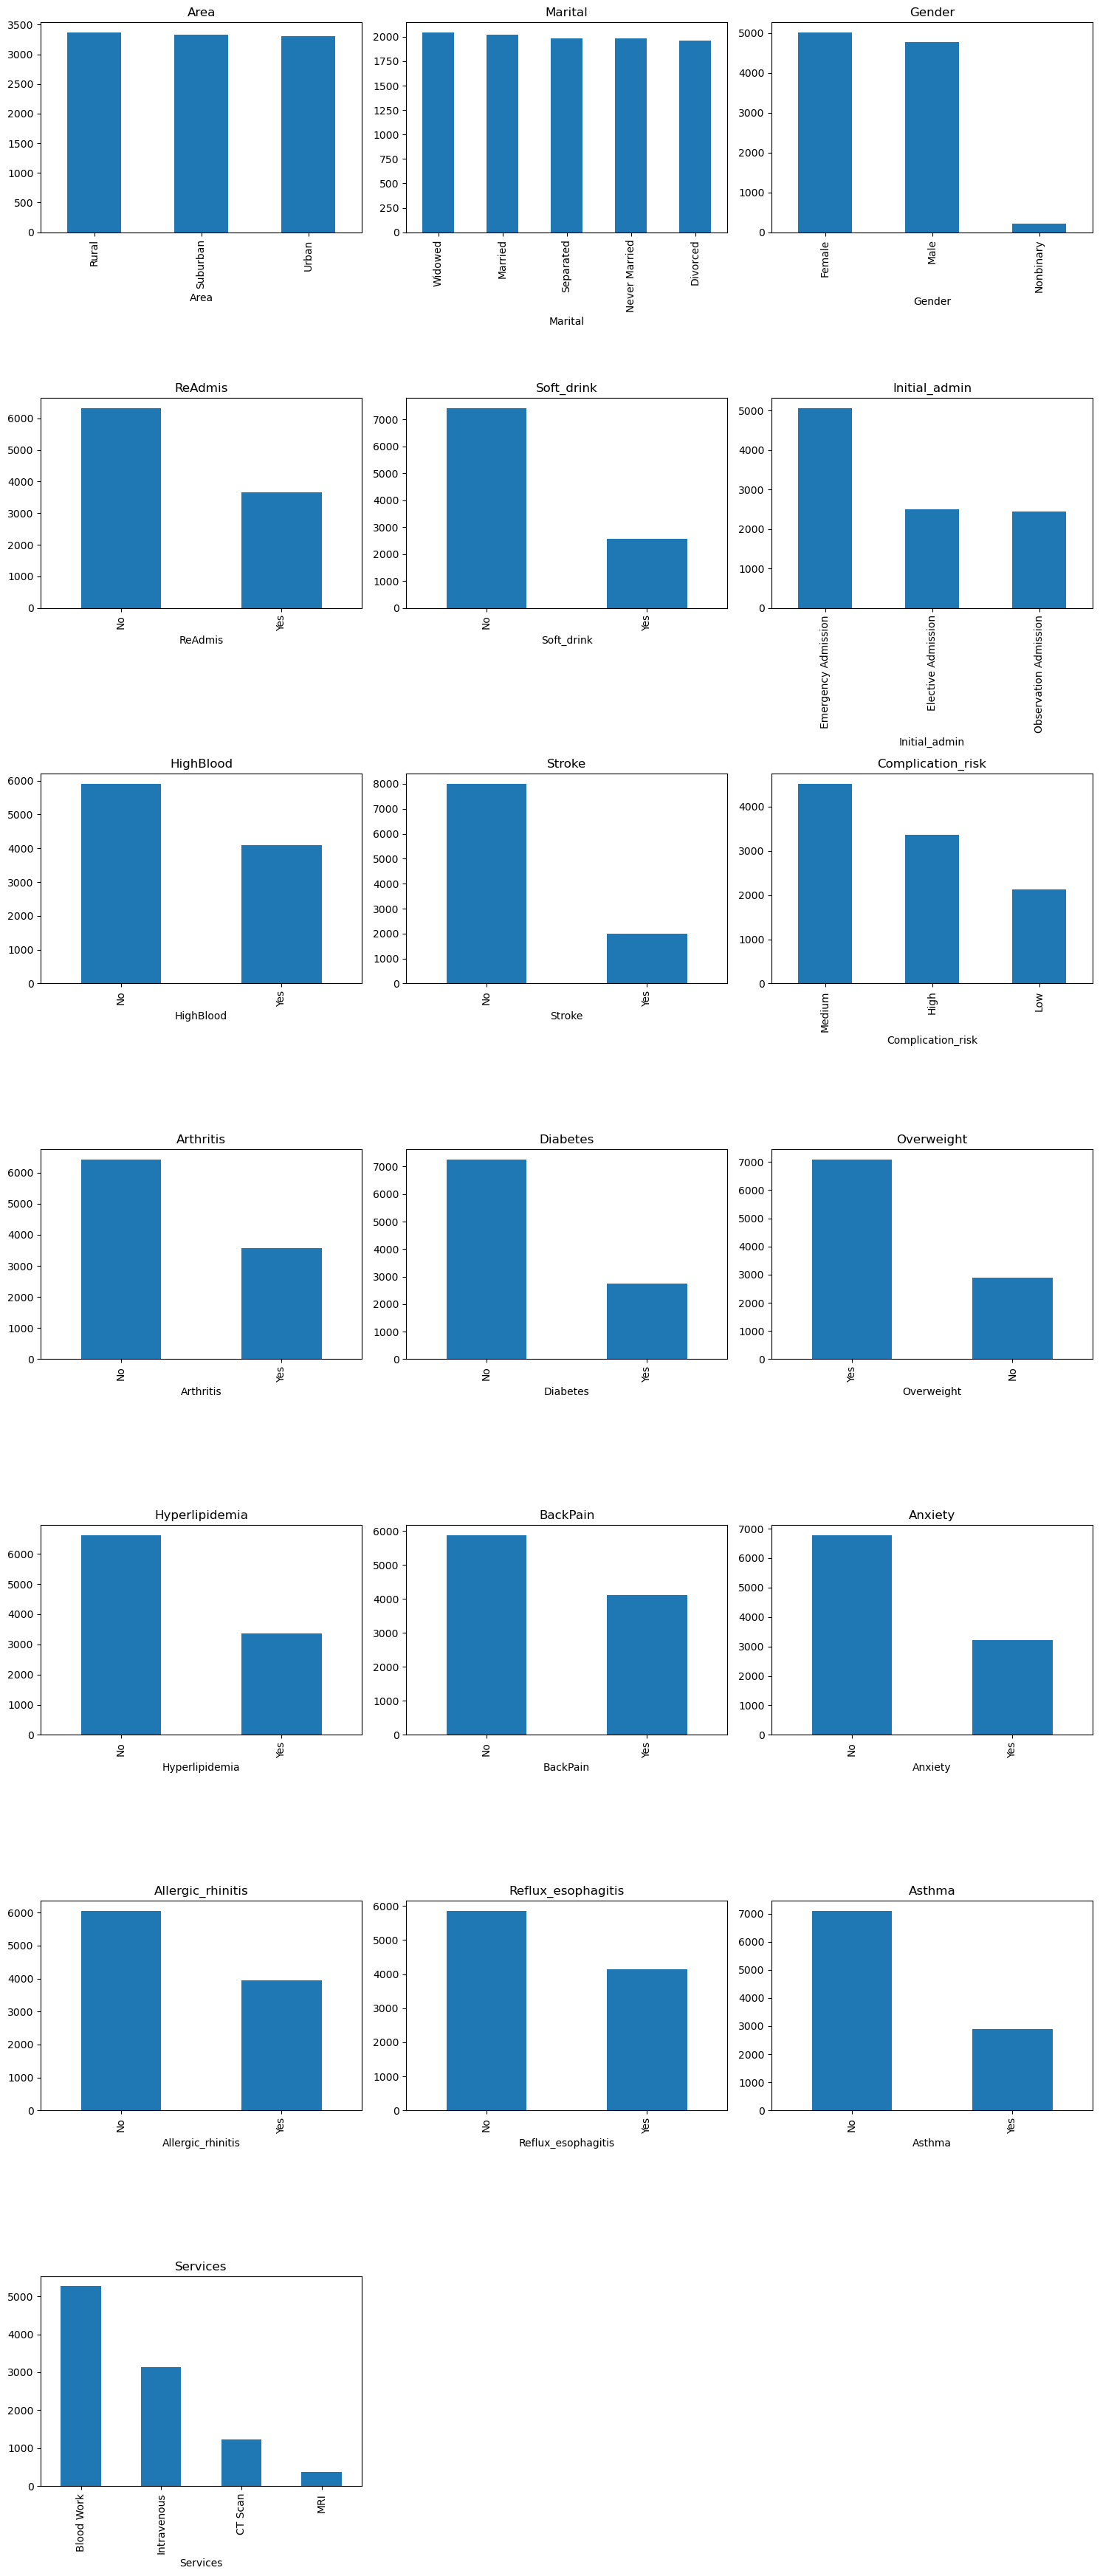

In [19]:
# Visualization for categorical variables
bar_graphs = ['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 
             'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 
             'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
             'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']

# Calculate the number of rows and columns for the subplots
num_rows = len(bar_graphs) // 3 + (1 if len(bar_graphs) % 3 != 0 else 0)
num_cols = min(3, len(bar_graphs))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(bar_graphs):
    row_index = i // num_cols
    col_index = i % num_cols
    df[col].value_counts().plot(kind='bar', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Remove any unused subplots
for i in range(len(bar_graphs), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [20]:
# Display the updated DataFrame
pd.set_option('display.max_columns', None)
print(df_new)

      Area  Children    Income  Marital  Gender  ReAdmis  VitD_levels  \
0        1         1  86575.93        0       1        0    19.141466   
1        2         3  46805.99        1       0        0    18.940352   
2        1         3  14370.14        4       0        0    18.057507   
3        1         0  39741.49        1       1        0    16.576858   
4        0         1   1209.56        4       0        0    17.439069   
...    ...       ...       ...      ...     ...      ...          ...   
9995     2         2  45967.61        4       1        0    16.980860   
9996     2         4  14983.02        4       1        1    18.177020   
9997     0         3  65917.81        3       0        1    17.129070   
9998     0         3  29702.32        0       1        1    19.910430   
9999     2         8  62682.63        3       0        1    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Initial_admin  \
0              6                 0          0  

In [22]:
# From Elleh (2023)

# Assign to X all the predictor features
X = df_new.drop(["Additional_charges"], axis=1)
print(X.shape)

# Assign to y to the target variable
y = df["Additional_charges"]
print(y.shape)

(10000, 25)
(10000,)


In [23]:
# From Elleh (2023)

# Initialize SKBest
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)
print(X_new.shape)

(10000, 25)


In [24]:
# From Elleh (2023)

# Calculate P-values for X
p_values = pd.DataFrame({'Feature': X.columns, 'p-value': skbest.pvalues_}).sort_values('p-value')
significant_features = p_values[p_values['p-value'] < 0.05]

# Print Features to keep and all P-values
features_to_keep = significant_features['Feature']
print("Features to keep:")
print(features_to_keep)
print("\nP-values:")
print(p_values)

Features to keep:
12            HighBlood
1              Children
17             Diabetes
4                Gender
14    Complication_risk
13               Stroke
9             vitD_supp
5               ReAdmis
11        Initial_admin
Name: Feature, dtype: object

P-values:
               Feature       p-value
12           HighBlood  0.000000e+00
1             Children  0.000000e+00
17            Diabetes  0.000000e+00
4               Gender  0.000000e+00
14   Complication_risk  0.000000e+00
13              Stroke  0.000000e+00
9            vitD_supp  0.000000e+00
5              ReAdmis  2.505193e-45
11       Initial_admin  4.296160e-02
2               Income  1.566348e-01
16           Arthritis  1.971610e-01
24            Services  2.424818e-01
0                 Area  2.541974e-01
18      Hyperlipidemia  2.636709e-01
6          VitD_levels  3.104130e-01
20             Anxiety  3.120522e-01
8     Full_meals_eaten  3.837865e-01
19            BackPain  4.517559e-01
15          Overweight 

In [25]:
# Check VIF for multicollinearity issues amongst these features

# Create a new DataFrame with the selected features
X_new = X[features_to_keep]
X_new.info()

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print the VIFs
print(vif)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   HighBlood          10000 non-null  int32
 1   Children           10000 non-null  int64
 2   Diabetes           10000 non-null  int32
 3   Gender             10000 non-null  int32
 4   Complication_risk  10000 non-null  int32
 5   Stroke             10000 non-null  int32
 6   vitD_supp          10000 non-null  int64
 7   ReAdmis            10000 non-null  int32
 8   Initial_admin      10000 non-null  int32
dtypes: int32(7), int64(2)
memory usage: 429.8 KB
             Feature       VIF
0          HighBlood  1.568058
1           Children  1.739607
2           Diabetes  1.318243
3             Gender  1.717506
4  Complication_risk  2.150924
5             Stroke  1.215652
6          vitD_supp  1.331071
7            ReAdmis  1.487972
8      Initial_admin  2.305965


In [26]:
# Save the filtered DataFrame to a CSV file
X_new.to_csv('filtered_med.csv', index=False)

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.8, test_size=0.2, random_state=15)

In [28]:
# Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [29]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)
print(y_pred)

[12328.9036999  10178.63256958 17241.90107932 ...  6569.59205112
 16127.82699264  8475.96194925]


In [30]:
# Identify optional values for parameters using hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_features': [2, 3, 4],
    'max_depth': [8, None]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV and training the modelgrid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [32]:
# Print MSE, RMSE, and R-squared without using the best parameters
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
accuracy = rf_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)
print("Accuracy:", accuracy)

Mean Squared Error (MSE): 29618315.451767694
Root Mean Squared Error (RMSE): 5442.27116668838
R-squared Score: 0.3204890449185698
Accuracy: 0.3204890449185698


In [33]:
# Check and print the best params
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Check the best score for the top performing model
best_score = grid_search.best_score_
print("Best Score:", best_score)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 8, 'max_features': 3, 'n_estimators': 100}
Best Score: 0.421252146671803


In [35]:
# Determine which features were the most predictive according to the Random Forest Regressor
feature_importances = best_rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

print("Top 5 Most Predictive Features:")
for i in range(5):
    feature_index = sorted_indices[i]
    feature_name = X_train.columns[feature_index]
    importance_score = feature_importances[feature_index]
    print(f"{i+1}. Feature '{feature_name}' - Importance: {importance_score}")

Top 5 Most Predictive Features:
1. Feature 'HighBlood' - Importance: 0.8884627966951729
2. Feature 'Children' - Importance: 0.032397898906595196
3. Feature 'vitD_supp' - Importance: 0.016516884540551845
4. Feature 'Initial_admin' - Importance: 0.014430078086577728
5. Feature 'Complication_risk' - Importance: 0.013309572514950444


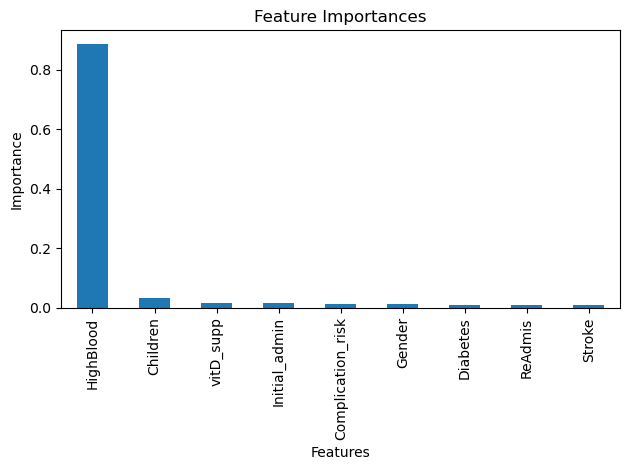

In [36]:
# From Shafi(2023)

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

# Set plot title and labels
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("feature_importances.png")
plt.show()

In [38]:
# Find the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred_best = best_rf_model.predict(X_test)
accuracy = best_rf_model.score(X_test, y_test)

# Re-calculate evaluation metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

# Print evaluation metrics
print("Evaluation Metrics for Best Model:")
print("Mean Squared Error:", mse_best)
print("Root Mean Squared Error:", rmse_best)
print("R-squared Score:", r2_best)
print("Accuracy Score", accuracy)

Evaluation Metrics for Best Model:
Mean Squared Error: 24852901.37467099
Root Mean Squared Error: 4985.268435568038
R-squared Score: 0.4298183913548882
Accuracy Score 0.4298183913548882


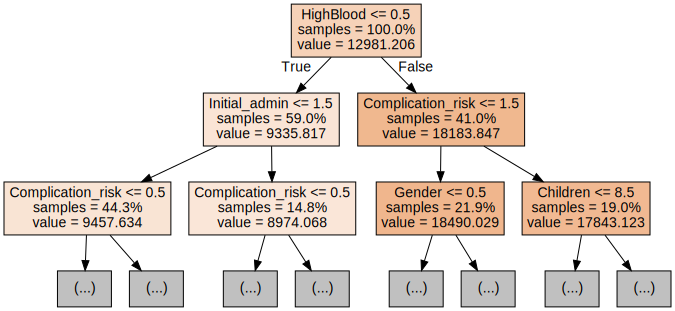

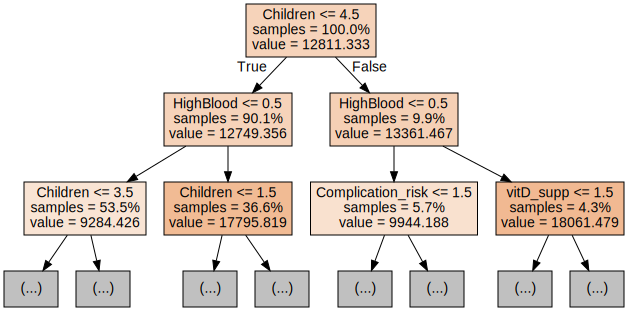

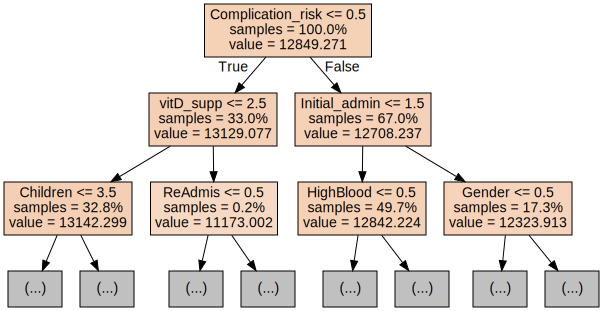

In [39]:
# From Shafi(2023)

# Define the directory to save the graphs
save_directory = r"C:\Users\kolgi\OneDrive - Western Governors University\d209\tree"

# Export the first three decision trees from the forest
for i in range(3):
    tree = best_rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_new.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    # Save the graph as an image file in the specified directory
    graph.render(filename=f"{save_directory}\\decision_tree_{i}", format='png')
    # Display the graph
    display(graph)